## Facial Recognition using Logistic Regression

#### <i>Importing scikit, pandas, numpy libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

#### <i> Declaring variables

In [2]:
features = [] # Features variable contains the list of all pixel intensity values from 0 to 255.
labels = [] # Labels variable consists of labels
costs = []
best_valid_err = 1
lr = 10e-8 # learning rate
reg = 10e-8 # regularization
first = True

#### <i> Reading csv file

In [3]:
%%time
for line in open('fer2013.csv'): 
    if first: # excluding header
        first = False
    else:
        row = line.split(',') # splitting each line by the delimiter
        labels.append(int(row[0])) # labels
        features.append([int(p) for p in row[1].split()]) # pixels

Wall time: 26.8 s


In [4]:
features, labels = np.array(features) / 255.0, np.array(labels) # convert to numpy arrays and normalization

#### <i>balance the class 1

In [5]:
%%time
features0, labels0 = features[labels!=1, :], labels[labels!=1] # take all the data which is not of class 1
features1 = features[labels==1, :] # take all the data of class 1
features1 = np.repeat(features1, 9, axis=0) #  take the length of class 1 and repeat 9 times
features = np.vstack([features0, features1])
labels = np.concatenate((labels0, [1]*len(features1)))

Wall time: 875 ms


In [6]:
features, labels = shuffle(features, labels) # shuffle the data

In [7]:
%%time
featuresvalid, labelsvalid = features[-1000:], labels[-1000:]  # validation sets
features, labels = features[:-1000], labels[:-1000]
N, D = features.shape # calculating shape

Wall time: 0 ns


In [8]:
labels_encoding = np.zeros((len(labels),len(set(labels)))) # matrix of 0's

In [9]:
for i in range(len(labels)):
    labels_encoding[i, labels[i]] = 1 # replacing the 0 matrix values by 1 at position of i and labels[i]
T = labels_encoding

#### <i>initialize weight of hidden and output layer

In [10]:
w = np.random.randn(D, len(set(labels))) / np.sqrt(D) # initialize weight
b = np.zeros(len(set(labels))) # initialize bias

In [11]:
%%time
for i in range(len(labels)):
    labels_encoding[i, labels[i]] = 1 # replacing the 0 matrix values by 1 at position of i and labels[i]
T = labels_encoding
w = np.random.randn(D, len(set(labels))) / np.sqrt(D) # initialize weight
b = np.zeros(len(set(labels))) # initialize bias
for i in range(10000):
    l = features.dot(w)+b # Forward propagation
    f = np.exp(l)/ np.exp(l).sum(axis=1,keepdims=True) # softmax activation function
    err = f - T # error in forward propagation
    w = w - lr*(features.T.dot(err) + reg*w) # update weight
    b = b - lr*(err.sum(axis=0)+reg*b) # update bias
    if i % 50 == 0: 
        l = featuresvalid.dot(w)+b # Forward propagation of validation set
        f = np.exp(l)/ np.exp(l).sum(axis=1,keepdims=True) # softmax activation function of validation set
        costResult = -np.log(f[np.arange(len(labelsvalid)), labelsvalid]).mean() # loss function using cross entropy
        costs.append(costResult) # appending costs
        predicted = np.argmax(f, axis=1) # predicted output
        error = 1 - np.mean(labelsvalid == predicted) # calculating error
        print("Iteration i:", i, " ||cost_function value :", costResult, " ||error Value:", error)
        if error < best_valid_err:
                    best_valid_err = error
print("best_valid_err:", best_valid_err) # printing best validation error

Iteration i: 0  ||cost_function value : 1.97460605838  ||error Value: 0.854
Iteration i: 50  ||cost_function value : 1.91425913921  ||error Value: 0.777
Iteration i: 100  ||cost_function value : 1.902277241  ||error Value: 0.773
Iteration i: 150  ||cost_function value : 1.8931969469  ||error Value: 0.774
Iteration i: 200  ||cost_function value : 1.88572712916  ||error Value: 0.764
Iteration i: 250  ||cost_function value : 1.87925507246  ||error Value: 0.756
Iteration i: 300  ||cost_function value : 1.87346939085  ||error Value: 0.755
Iteration i: 350  ||cost_function value : 1.8681991393  ||error Value: 0.753
Iteration i: 400  ||cost_function value : 1.86334223928  ||error Value: 0.752
Iteration i: 450  ||cost_function value : 1.85883227106  ||error Value: 0.747
Iteration i: 500  ||cost_function value : 1.8546224243  ||error Value: 0.741
Iteration i: 550  ||cost_function value : 1.85067741338  ||error Value: 0.741
Iteration i: 600  ||cost_function value : 1.84696921984  ||error Value: 

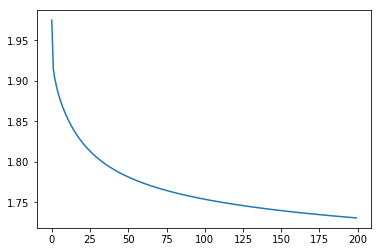

In [12]:
plt.plot(costs) # plotting costs
plt.show()

In [13]:
from sklearn.metrics import classification_report
print(classification_report(labelsvalid, predicted))

             precision    recall  f1-score   support

          0       0.15      0.04      0.07       113
          1       0.39      0.40      0.40       129
          2       0.24      0.07      0.10       137
          3       0.38      0.68      0.49       222
          4       0.24      0.19      0.21       156
          5       0.45      0.47      0.46        97
          6       0.29      0.34      0.31       146

avg / total       0.31      0.34      0.31      1000

